
# Question 3

Bayes Decision Rule is a decision theory which is informed by Bayesian Probability. By using
probabilities and costs, Bayes decision rule tries to quantify the trade-off between various
decisions. A classifier who applies such a decision theory uses the concepts of Bayesian statistics to
estimate the expected value of its decisions.<br>
Assume an Image Segmentation problem, in which the goal
is to classify pixels of an image into three classes, ‘sabzeh’,
‘ribbon’ and ‘background’.<br>
The dataset contains 15 pixels and their RGB values.
Suppose that you are only allowed to use two channels.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("a_input.txt", sep=" ", encoding = 'utf8')
data = np.asarray(df[['Label', 'c-1', 'c-2','c-3']])
df[['Label', 'c-1', 'c-2','c-3']]

,Label,c-1,c-2,c-3
0,1,69,116,14
1,1,88,132,35
2,1,104,157,17
3,1,25,22,17
4,1,99,145,98
5,2,208,30,44
6,2,113,19,20
7,2,159,11,23
8,2,199,19,31
9,2,249,141,167


### a) By visual inspection using 2D feature space, evaluate which two channels are the most suited.

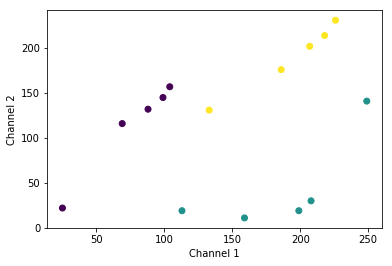

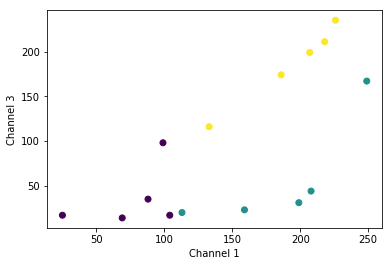

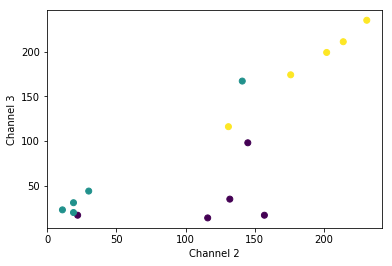

In [3]:
for i in range (0, 3):
    for j in range(i+1, 3):
        plt.scatter(data[:,(i+1)], data[:,(j+1)], c=data[:,0])
        plt.xlabel("Channel " + str(i+1))
        plt.ylabel("Channel " + str(j+1))
        plt.show()
        print ("\n")


It seems that the pair **(Channel-1, Channel 2)** is the best pair. Because all points can be classified correctly with two lines. 

### b) Design a classifier using the Bayes rule by considering the two features you picked in the previous part. The data are assumed to have Gaussian distributions with the same covariance matrix $ \Sigma = I_2 $ . Find the general form of the discriminant function.

We need to calculate the following inequality:
$$ \frac{p(x|\omega_1)}{p(x|\omega_2)} - \frac{p(\omega_2)}{p(\omega_1)} \geq_{\omega_1} 0$$
Which is equal to:
$$ \frac{\exp(-\frac{1}{2} (x-\mu_1)^T\Sigma(x-\mu_1))}{\exp(-\frac{1}{2} (x-\mu_2)^T\Sigma(x-\mu_2))}  \geq_{\omega_1}  \frac{p(\omega_2)}{p(\omega_1)} \rightarrow$$
<br>

$$ \frac{\exp(-\frac{1}{2} (x-\mu_1)^T (x-\mu_1))}{\exp(-\frac{1}{2} (x-\mu_2)^T (x-\mu_2))}  \geq_{\omega_1} 1 \rightarrow $$
<br>
$$ \exp(-\frac{1}{2} (x-\mu_1)^T (x-\mu_1))  \geq_{\omega_1} \exp(-\frac{1}{2} (x-\mu_2)^T (x-\mu_2)) \rightarrow $$
<br>
$$ (x-\mu_2)^T (x-\mu_2)   \geq_{\omega_1} (x-\mu_1)^T (x-\mu_1) \rightarrow $$
<br>
$$ x^T (\mu_1-\mu_2) + \frac{1}{2} (\mu_1^T\mu_1 - \mu_2^T\mu_2)  \geq_{\omega_1}  0$$

So the descriminant function is a hyperplane with norm $\mu_1-\mu_2$

In [28]:
test = np.array(
                [[ 196, 34, 49],
                [ 195, 180, 185],
                [ 255, 88, 116],
                [ 125, 110, 43],
                [ 110, 146, 108]])
# print (data)
# print (data[data[:,0]==1])
avg = []
for i in range(1, 4):
    sel = data[data[:,0]==i]
    t = np.average(sel, axis=0)
    avg.append(t)
avg = np.asarray(avg)
print (avg)

[[  1.   77.  114.4  36.2]
 [  2.  185.6  44.   57. ]
 [  3.  194.  190.8 187. ]]


In [75]:
import sys
def identify_class(x, mu):
    for k in range(0,3):
        point =0
        for l in range (0,3):
            if (k==l):
                continue
            # print (2*np.matmul(x.T, mu[k]-mu[l])+np.matmul(mu[k].T, mu[k])-np.matmul(mu[l].T, mu[l]))
            # print (x)
            # print (mu[k])
            # print (mu[l])
            # print (2*np.matmul(x.T, mu[k]-mu[l])+np.matmul(mu[k].T, mu[k])-np.matmul(mu[l].T, mu[l])>=0)
            
            if (2*np.matmul(x, mu[l]-mu[k])+np.dot(mu[k], mu[k])-np.dot(mu[l], mu[l])<=0):
                point +=1
        # print (k,"point",  point)
        if (point == 2):
            
            return k
        
    print ("ERROR")
    return 0
            
                
                
    
        

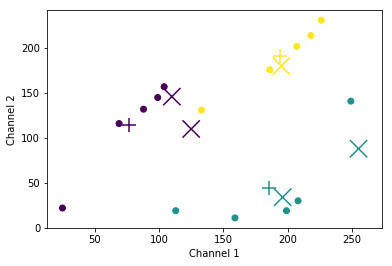

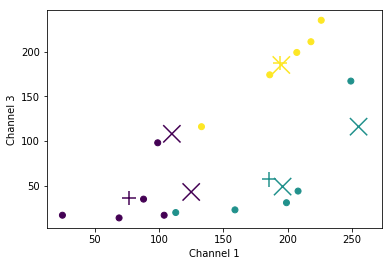

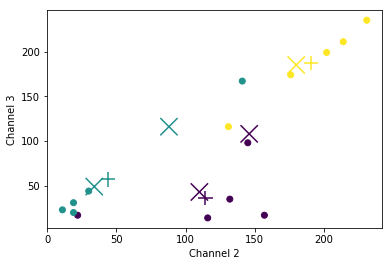

In [76]:
for i in range(0, 3):
    for j in range(i+1, 3):
        plt.scatter(data[:,(i+1)], data[:,(j+1)], c=data[:,0])
        plt.scatter(avg[:,(i+1)], avg[:,(j+1)], c=avg[:,0], marker='+', s=200 )
        x = test[:,[i,j]]
        mu = avg[:,[i+1, j+1]]
        cls = []
        
       
        for point in x:
            cls.append(identify_class(point, mu))
                
        plt.scatter(x[:,0], x[:,1], c=cls, marker='x', s=300  )
        
        plt.xlabel("Channel " + str(i+1))
        plt.ylabel("Channel " + str(j+1))
        plt.show()
        print ("\n")